In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Strong hypothesis formulation

A strong hypothesis at a minimum needs to be declarative and testable. It allows us to test clear ideas backed by logic or preliminary data, and iterate systematically to converge on the most suitable decision and confirm or correct our understanding.

Select the strongest hypothesis that is most suitable for A/B testing.

### Possible Answers


    Will introducing several steps in the sign-up flow create friction and result in higher drop off rates?
    
    
    Based on user experience research, we believe that if we deploy our content personalization model then user engagement will increase as measured by the average hours per subscriber (HPS). {Answer}
    
    
    Making the pay-wall call-to-action clearer will increase purchases.

**This is an excellent hypothesis to test. It follows a logical format, is based on research, and explicitly defines the metric used to evaluate the result.**

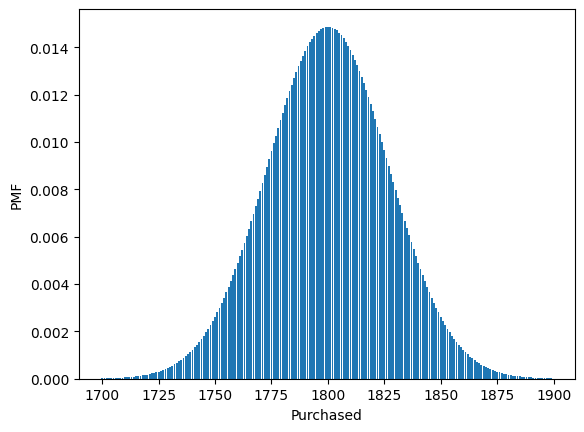

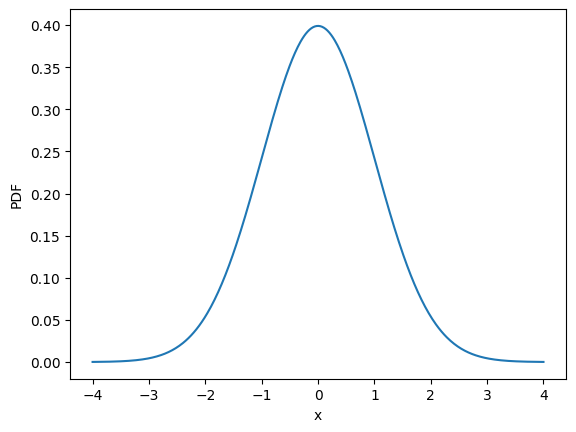

'\nNice work! You just plotted a binomial and a standard normal distribution. The binomial distribution is discrete and describes the probabilities of x successes in n trials, while the normal distribution is continuous and enables us to make inferences about the overall population. Both are key distributions in A/B testing.\n'

In [17]:
# exercise 01

"""
Plotting distributions

Understanding how both discrete (e.g. binomial) and continuous (e.g. normal) probability distributions play a role in A/B testing enables us to gain additional visual insights into the nature of the data and deeper conceptual understanding of the theories that power the statistical frameworks of online experimentation.

Of great importance are two distributions: the binomial and the normal distributions. Follow the instructions to create plots and explore their parameters.
"""

# Instructions

"""

    Plot a binomial distribution with probability of success p = 0.6 and number of trials n = 3000.
---
    Plot a normal distribution with mean = 0 and standard deviation = 1.

"""

# solution

from scipy.stats import binom 
import matplotlib.pyplot as plt
import numpy as np

# Plot a binomial distribution
p = 0.6
n = 3000 

x = np.arange(n*p - 100, n*p + 100) 
binom_a = binom.pmf(x, n, p)

plt.bar(x, binom_a)
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.show()

#----------------------------------#

from scipy.stats import norm
import seaborn as sns

# Plot a normal distribution
mean = 0
sd = 1

x = np.linspace(-4, 4, 500)
norm_a = norm.pdf(x, mean, sd)

sns.lineplot(x=x, y=norm_a)
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work! You just plotted a binomial and a standard normal distribution. The binomial distribution is discrete and describes the probabilities of x successes in n trials, while the normal distribution is continuous and enables us to make inferences about the overall population. Both are key distributions in A/B testing.
"""

In [19]:
import pandas as pd

checkout = pd.read_csv(path_data+'checkout.csv', index_col=0)
checkout.head()

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696


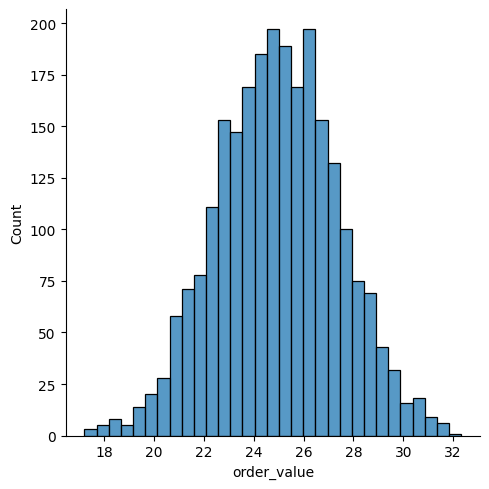

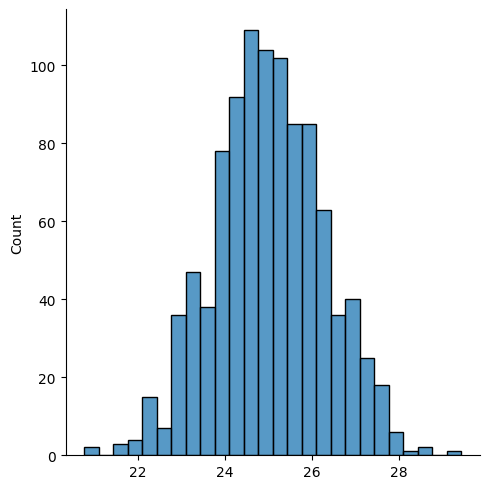

'\nExcellent work! Note how even for a small sample size of five, the sampling distribution of the means still resembles a normal one since the underlying data is already normally distributed.\n'

In [21]:
# exercise 02

"""
Central limit theorem for means

Regardless of the distribution of the data, the central limit theorem (CLT), among other benefits, allows us to assume normality of the sampling distributions of metrics that we often examine in A/B testing such as means, sums, proportions, standard deviations, and percentiles. Statistical significance tests that assume normality can therefore be easily applied to such scenarios in order to make solid conclusions about our experiments.

The goal of this exercise is to demonstrate how the CLT applies to various distributions and appreciate its power.

The following has been loaded for you:

    the checkout DataFrame
    pandas as pd
    numpy as np
    matplotlib as plt
    seaborn as sns

"""

# Instructions

"""
Question

    Create a displot select that the correct shape of the distribution of the order_value column filtered on checkout_page 'A'.

Possible answers
Binomial with an average of $25
Normal with an average of $15
Exponential with an average of $15
Normal with an average of $25 {Answer}

---

    Create an empty list sampled_means to store the sampled means, then create a for loop to simulate the means taken from 1000 samples of size 5 each with replacement and store the results in sample.
---

    Calculate the sample mean for each sample and append to the sampled_means list.
---

    Plot the distribution of the sampled_means list.

"""

# solution

sns.displot(checkout[checkout['checkout_page']=="A"]['order_value'])
plt.show()

#----------------------------------#

np.random.seed(47)

# Create an empty list, then a for loop for 1000 samples of size 5
sampled_means = []

for i in range(1000):
    sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)
    # Get the sample mean and append to list
    sample_mean = np.mean(sample)
    sampled_means.append(sample_mean)
    
# Plot distribution
sns.displot(sampled_means)
plt.show()

#----------------------------------#

# Conclusion

"""
Excellent work! Note how even for a small sample size of five, the sampling distribution of the means still resembles a normal one since the underlying data is already normally distributed.
"""

# Interpreting p-values

The p-value is one of the most misinterpreted concepts in statistics. Understanding what it represents and how to estimate it will serve you tremendously when designing and analyzing A/B tests.

![P_value](/home/nero/Documents/Estudos/DataCamp/Python/courses/ab-testing-in-python/p_value-01.png)

# Error rates in the wild

Error rates come up in several data science topics such as machine learning and A/B testing. Let's make sure we fully understand what they represent.

Which of the following statements about error rates is true?

### Possible Answers


    Type II error is committed when we fail to reject the Null hypothesis when we should have. {Answer}
    
    
    Setting the false positive rate at 10% means that we would fail to reject the Null hypothesis 10% of the time.
    
    
    Alpha = 2% would mean that 2% is the minimum difference in average metrics between the control and treatment that the test is powered to capture.

**Perfect! Type II error is the same as the false negative rate beta.**

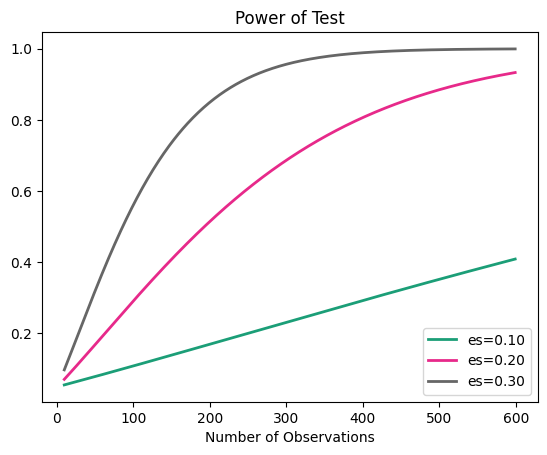

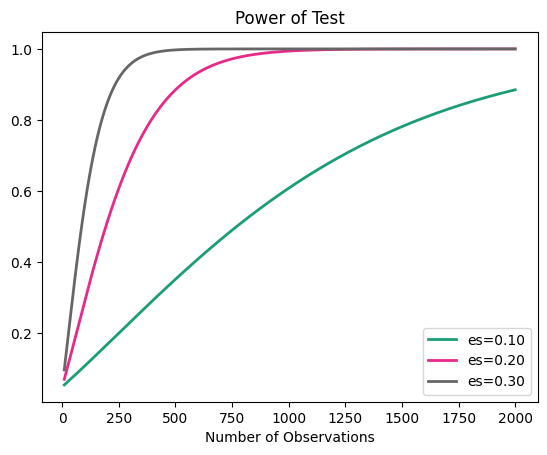

"\nThat's right! A smaller effect size requires a larger sample to detect for the same power and significance level.\n"

In [24]:
# exercise 03

"""
Plotting power curves

Performing a power analysis prior to running an A/B test is one of the most important steps. It enables us to improve our chances of reaching conclusive results and better plan for resources and time allocated to each test. Moreover, plotting power curves makes it easier to visualize the impact of varying certain parameters on the required sample size to hit the desired levels of confidence. Although a larger sample size betters our chances of reaching a conclusive result, gathering additional units or spending more time is a waste of resources as the power curves saturate.

Let's see how it works in practice.
"""

# Instructions

"""

    Create NumPy arrays for the sample_sizes ranging from 10 to 600, and effect_sizes of 0.1, 0.2, and 0.3.
---

    Plot the power curves for the defined sample_sizes and effect_sizes.
---

    Adjust the NumPy arrays for the sample_sizes ranging from 10 to 2000, and effect_sizes of 0.1, 0.2, and 0.3.
---
Question

    What are the approximate sample sizes needed per group for each of the effect sizes to hit 80% power?

    Possible answers:
    
    175, 400, and 1600 observations for effect sizes 0.1, 0.2, and 0.3 respectively.
    
    175, 400, and 1600 observations for effect sizes 0.3, 0.2, and 0.1 respectively. {Answer}
    
    1600 observations for all effect sizes.
"""

# solution

from statsmodels.stats.power import TTestIndPower

# Specify parameters for power analysis
sample_sizes = np.array(range(10, 600))
effect_sizes = np.array([0.1, 0.2, 0.3])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

#----------------------------------#

from statsmodels.stats.power import TTestIndPower

# Adjust the parameters for power analysis
sample_sizes = np.array(range(10,2000))
effect_sizes = np.array([0.1, 0.2, 0.3])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

#----------------------------------#

# Conclusion

"""
That's right! A smaller effect size requires a larger sample to detect for the same power and significance level.
"""

In [26]:
# exercise 04

"""
Sample size for means

When designing an A/B test, you as a Data Scientist are responsible for checking if a test is feasible in the first place. This entails answering several questions such as: do we have enough traffic? How do we quantify "enough"? What is the minimum difference we can detect given the sample size we have? How long does an experiment need to run? And more.

In this exercise, you will calculate the minimum sample size required to capture a statistically significant difference of a certain value between the baseline mean order_value for the control group, and a new design to be tested.pandas, numpy,matplotlib, seaborn libraries and the checkout DataFrame are already imported and loaded for you, as well as power from statsmodels.stats.
"""

# Instructions

"""

    Calculate the mean and standard deviation of order_value column of checkout_page 'B'.
---

    Assign the mean_new value of $31 as our practical significance level and use the formula shown in the video for calculating the standard effect size for means.
---

    Calculate the required sample size per group given the default parameters for power and significance level.

"""

# solution

from statsmodels.stats import power

# Calculate and print the baseline mean and standard deviation
mean_B = checkout[checkout['checkout_page']=='B']['order_value'].mean()
print(mean_B)

std_B = checkout[checkout['checkout_page']=='B']['order_value'].std()
print(std_B)

# Define mean_new and calculate the standardized effect size
mean_new = 31

std_effect_size=(mean_new-mean_B)/std_B
print(std_effect_size)

# Calculate the required sample size
sample_size = power.TTestIndPower().solve_power(effect_size=std_effect_size, power=0.8, alpha=0.05, nobs1=None)

print(sample_size)

#----------------------------------#

# Conclusion

"""
Remarkable job! 660 is the approximate sample size needed per group to at least capture a difference of a dollar between the baseline group and the new page design if the new design actually has that effect or larger.
"""

29.876202331571395
7.277644184694845
0.15441778134633083
659.289238094274


'\nRemarkable job! 660 is the approximate sample size needed per group to at least capture a difference of a dollar between the baseline group and the new page design if the new design actually has that effect or larger.\n'

In [30]:
homepage = pd.read_csv(path_data+'homepage.csv', index_col=0).reset_index(drop=True)
homepage.head()

,user_id,landing_page,signup,time_on_page
0,511265,A,0.0,36.466340
1,369773,A,1.0,27.601022
2,433024,A,0.0,31.361797
3,214829,A,0.0,39.565806
4,77688,A,0.0,37.139127


In [32]:
# exercise 05

"""
Sample size for proportions

Real datasets can be messy. As an Analytics Engineer working with data in the real world, you will encounter situations where the variance in the data is too high to be able to capture a meaningful difference in the metrics. This problem is more likely to happen with continuous metrics such as the average order value in the previous exercise. There are several ways to tackle this, but one of the workarounds is finding a metric that has lower variance but still aligns with the business goals.

Here you will look at calculating the sample size for a binary metric; signup rate which represents whether a user signed up for the service or not, as opposed to the paid price which may vary more between users. The homepage DataFrame and pandas, numpy libraries are already loaded for you, as well as proportion_effectsize from statsmodels.stats.proportion and power from statsmodels.stats.
"""

# Instructions

"""

    Calculate the signup rate of landing_page 'A'.
---

    Use 7% as the minimum desired new signup rate p_new and calculate the standardized effect size.
---

    Calculate the required sample size per group given the default parameters for power and significance level.
---

"""

# solution

from statsmodels.stats.proportion import proportion_effectsize

# Calculate the baseline signup rate for group A
p_A=homepage[homepage['landing_page']=='A']['signup'].mean()
print('Group A mean signup rate:',p_A)

# Define p_new and calculate standardized effect size
p_new = 0.07

effect_size_std = proportion_effectsize(p_new, p_A)
print(effect_size_std)

# Calculate the required sample size per group
sample_size = power.TTestIndPower().solve_power(effect_size=effect_size_std, power=0.8, alpha=0.05, nobs1=None)

print(round(sample_size, 1))

#----------------------------------#

# Conclusion

"""
Great work! To capture a true difference of at least 1.8% in signup rates we would need a sample size of at least 2,837 per group. The smaller the desired difference, the larger the required sample size.
"""

Group A mean signup rate: 0.052222222222222225
0.07440854623232801
2836.2


'\nGreat work! To capture a true difference of at least 1.8% in signup rates we would need a sample size of at least 2,837 per group. The smaller the desired difference, the larger the required sample size.\n'

# Is a multiple comparisons correction needed?

Let's assume that you are an Analytics Engineer facing several experimental design scenarios where a multiple comparisons correction may be needed to avoid inflating the false positive error rate. Think about the conditions in each scenario and how the number of metrics, variants, or subcategories tested in each experiment might impact the need for a correction.

![Comparison_test](/home/nero/Documents/Estudos/DataCamp/Python/courses/ab-testing-in-python/multi_comp_test.png)

In [34]:
# exercise 06

"""
Corrected p-values

Imagine you are a Data Scientist working for a subscription company. The web design team is working on finding the perfect CTA (call-to-action) button to urge page visitors to sign up for their service. They presented you with 4 different designs besides the current version.

After running an experiment comparing each variant to the control, you generated a list of p-values loaded in the pvals variable. Comparing them directly to the significance threshold would result in an inflated Type I error rate. To avoid this, you can use the smt.multipletests() function from Python's statsmodels library to correct the p-values and test for statistical significance with a FWER = 5%.
"""

# Instructions

"""

    Perform a Bonferroni correction to the list of p-values using alpha = 0.05.
---
    Perform a Sidak correction to the list of p-values using alpha = 0.05.

"""

# solution

import statsmodels.stats.multitest as smt

pvals = [0.0126, 0.0005, 0.00007, 0.009]

# Perform a Bonferroni correction and print the output
corrected = smt.multipletests(pvals, alpha = 0.05, method = 'bonferroni')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Bonferroni Corrected alpha: {:.4f}'.format(corrected[3]))

#----------------------------------#

pvals=[0.0126, 0.0005, 0.00007, 0.009]

# Perform a Sidak correction and print the output
corrected = smt.multipletests(pvals, alpha = 0.05, method = 'sidak')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Sidak Corrected alpha: {:.4f}'.format(corrected[3]))

#----------------------------------#

# Conclusion

"""
Looks like the results have changed and the hypothesis corresponding to the first p-value is now rejected! Since the Bonferroni correction is the strictest method, other corrections may flip the results for the edge cases.
"""

Significant Test: [False  True  True  True]
Corrected P-values: [0.0504  0.002   0.00028 0.036  ]
Bonferroni Corrected alpha: 0.0125
Significant Test: [ True  True  True  True]
Corrected P-values: [0.04945542 0.0019985  0.00027997 0.03551691]
Sidak Corrected alpha: 0.0125


'\nLooks like the results have changed and the hypothesis corresponding to the first p-value is now rejected! Since the Bonferroni correction is the strictest method, other corrections may flip the results for the edge cases.\n'